In [184]:
import xml
import numpy as np
from pylab import *
%matplotlib inline
import xml.etree.ElementTree as ET
import cv2
import os
from matplotlib import pyplot
from matplotlib import patches

In [3]:

home_dir = os.path.expanduser('~') + "/"
datasets_dir = home_dir + "external_drive/"
voc_2012_dir = datasets_dir + "VOC/VOC2012/VOCdevkit/VOC2012/"
print(voc_2012_dir)

/home/ubuntu/external_drive/VOC/VOC2012/VOCdevkit/VOC2012/


In [11]:
# Get list of training images
train_filenames = []
with open(voc_2012_dir + "ImageSets/Main/train.txt", "r") as file:
    for line in file:
        train_filenames.append(line.strip())

In [12]:
train_filenames[:10]

['2008_000008',
 '2008_000015',
 '2008_000019',
 '2008_000023',
 '2008_000028',
 '2008_000033',
 '2008_000036',
 '2008_000037',
 '2008_000041',
 '2008_000045']

In [138]:
class bounding_box:
    def __init__(self, class_name, xmin, xmax, ymin, ymax):
        self.class_name = class_name
        #self.bbox_coords = bbox_coords #xmax, xmin, ymax, ymin
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax

In [147]:
# Read an annotation file, return a list of bounding boxes
def get_bounding_boxes(filename):
    bounding_boxes = []
    xmldoc = ET.parse(voc_2012_dir + "Annotations/{}.xml".format(filename))
    objects = xmldoc.findall('object')
    for thing in objects:
        name = thing.find('name').text
        box = thing.find('bndbox')
        xmax = int(box.find('xmax').text)
        xmin = int(box.find('xmin').text)
        ymax = int(box.find('ymax').text)
        ymin = int(box.find('ymin').text)
        bounding_boxes.append(bounding_box(name, xmin, xmax, ymin, ymax))
    return bounding_boxes
#read_annotation("2011_005768")

In [148]:
get_bounding_boxes("2011_005768")[0].class_name

'person'

In [142]:
# Returns a [height, width, depth] image in RGB pixel order
def read_jpeg(filename):
    image = cv2.imread(voc_2012_dir + "JPEGImages/{}.jpg".format(filename))
    if image is None:
        print("Failed to read image! This is probably bad")
    # Convert BGR to RGB. 
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [180]:
# Plots an image from either filename or numpy array. Optionally draws bounding boxes with class name labels
def show_image(image, bounding_boxes = []):
    if isinstance(image, str):
        image = read_jpeg(image)
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.imshow(image)
    for box in bounding_boxes:
        ax.add_patch(
            patches.Rectangle(
                (box.xmin,box.ymin),
                box.xmax - box.xmin,
                box.ymax - box.ymin,
                fill=False, edgecolor="red", linewidth=3    
            ))
        ax.text(box.xmin + 10,box.ymin + 30, box.class_name, fontsize=16, color = "red")

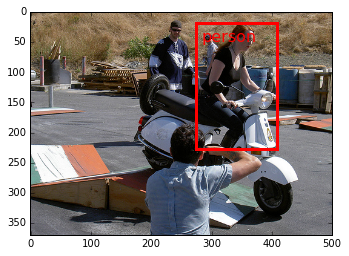

In [181]:
image_name = "2011_005768"
show_image(read_jpeg(image_name), get_bounding_boxes(image_name))

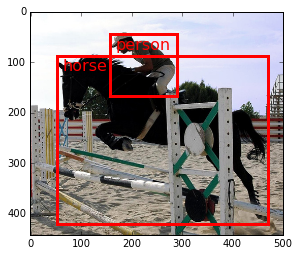

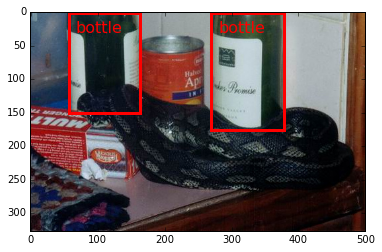

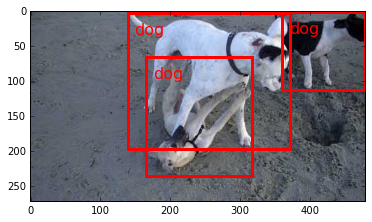

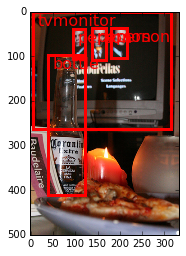

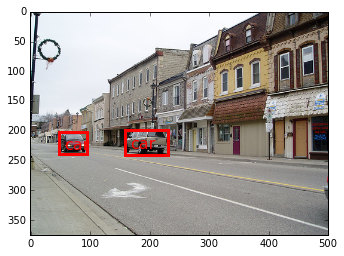

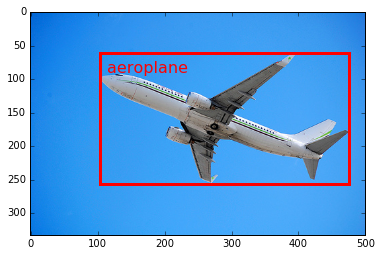

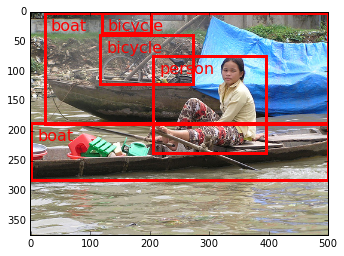

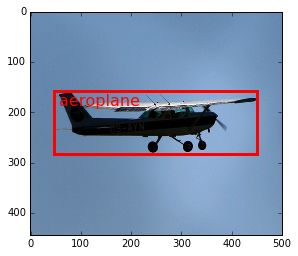

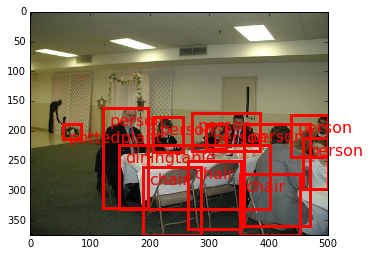

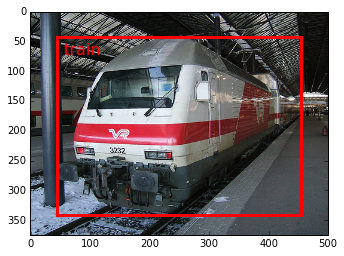

In [177]:
for name in filenames[:10]:
    show_image(read_jpeg(name), get_bounding_boxes(name))